In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df=pd.read_csv('/content/telecom_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [219]:
df.columns = df.columns.str.lower()

In [220]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [221]:
df = df.drop('customerid', axis=1)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [222]:
df.head(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [223]:
yes_no_cols = [
    'partner',
    'dependents',
    'phoneservice',
    'paperlessbilling',
    'churn'
]

df[yes_no_cols] = df[yes_no_cols].apply(lambda x: x.str.strip().str.lower())
for col in yes_no_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df.head(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [224]:
cols = ["multiplelines",
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]

for col in cols:
    print(f"\n{col.upper()}")
    print(df[col].unique())



MULTIPLELINES
['No phone service' 'No' 'Yes']

ONLINESECURITY
['No' 'Yes' 'No internet service']

ONLINEBACKUP
['Yes' 'No' 'No internet service']

DEVICEPROTECTION
['No' 'Yes' 'No internet service']

TECHSUPPORT
['No' 'Yes' 'No internet service']

STREAMINGTV
['No' 'Yes' 'No internet service']

STREAMINGMOVIES
['No' 'Yes' 'No internet service']


In [225]:
for col in cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

In [226]:
df.head(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [227]:
print("Churn percentage:")
print(df['churn'].value_counts(normalize=True) * 100)

Churn percentage:
churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [228]:
print("Average tenure:")
print(df.groupby('churn')['tenure'].mean())

Average tenure:
churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


In [229]:
print("Average Monthly Charges:")
print(df.groupby('churn')['monthlycharges'].mean())

Average Monthly Charges:
churn
0    61.265124
1    74.441332
Name: monthlycharges, dtype: float64


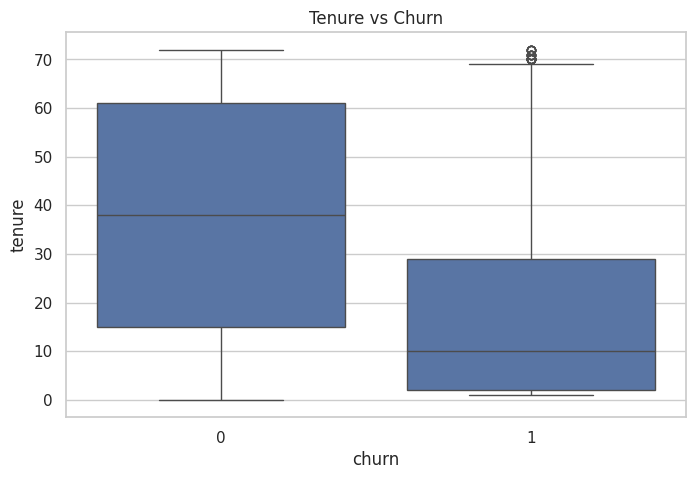

In [230]:
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

In [231]:
pd.crosstab(df['contract'], df['churn'], normalize='index') * 100

churn,0,1
contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [232]:
sns.set(style="whitegrid")
%matplotlib inline

/tmp/ipython-input-3666815912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette='Set2')


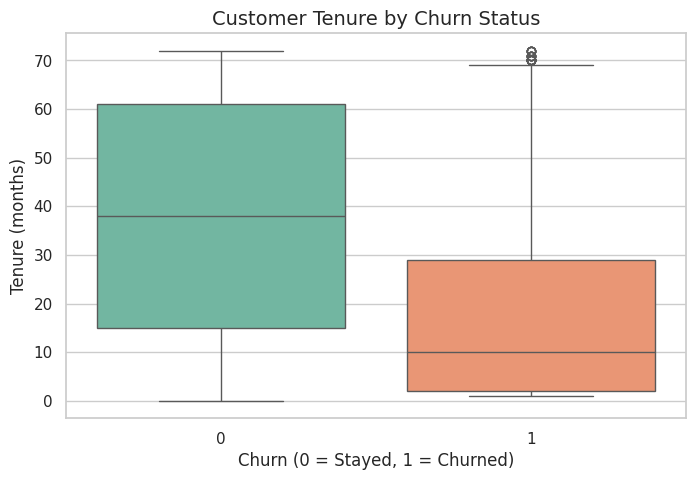

In [233]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='tenure', data=df, palette='Set2')
plt.title('Customer Tenure by Churn Status', fontsize=14)
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Tenure (months)')
plt.show()

/tmp/ipython-input-1532124158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='monthlycharges', data=df, palette='Set2')


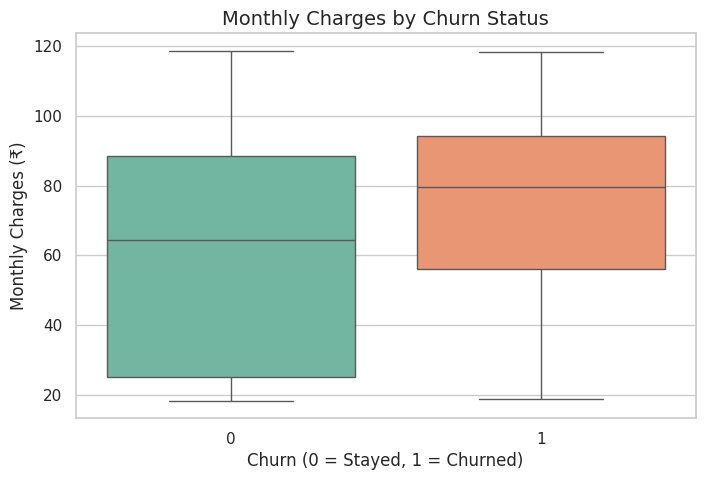

In [234]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='monthlycharges', data=df, palette='Set2')
plt.title('Monthly Charges by Churn Status', fontsize=14)
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Monthly Charges (₹)')
plt.show()

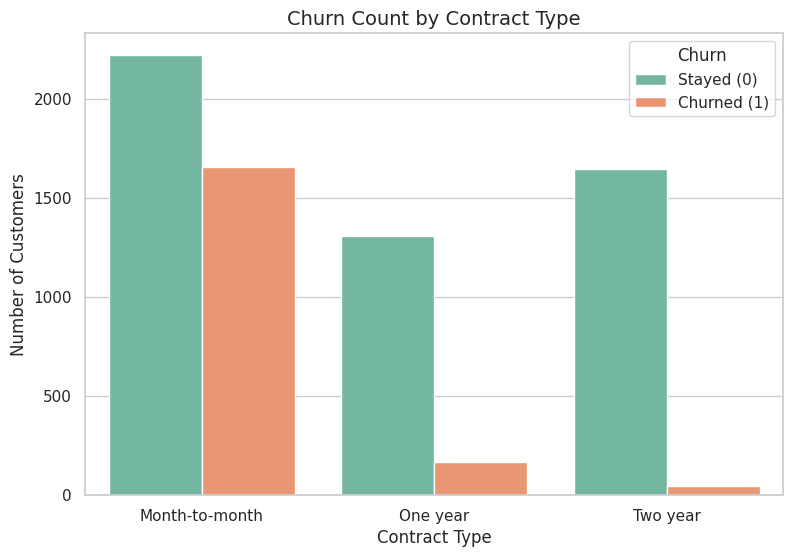

In [235]:
plt.figure(figsize=(9, 6))
sns.countplot(x='contract', hue='churn', data=df, palette='Set2')
plt.title('Churn Count by Contract Type', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


Churn Percentage by Contract:
                Stayed (%)  Churned (%)
contract                               
Month-to-month       57.29        42.71
One year             88.73        11.27
Two year             97.17         2.83


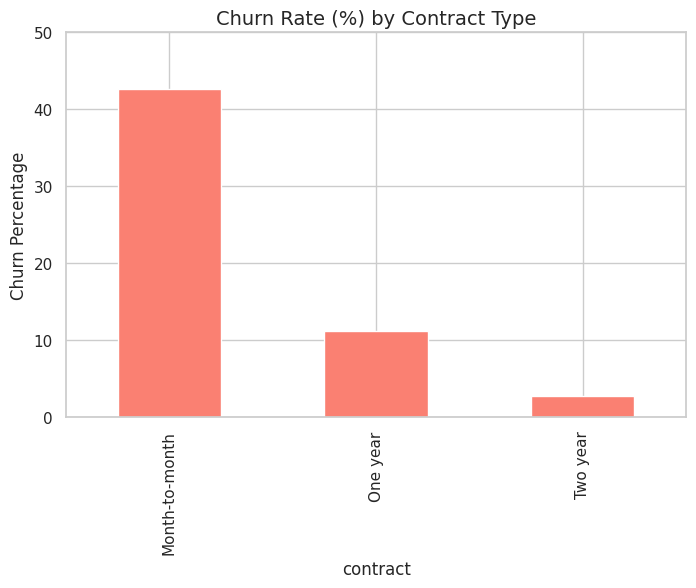

In [236]:
contract_churn = pd.crosstab(df['contract'], df['churn'], normalize='index') * 100
contract_churn.columns = ['Stayed (%)', 'Churned (%)']

print("\nChurn Percentage by Contract:")
print(contract_churn.round(2))

# Optional: bar plot of churn %
contract_churn['Churned (%)'].plot(kind='bar', figsize=(8,5), color='salmon')
plt.title('Churn Rate (%) by Contract Type', fontsize=14)
plt.ylabel('Churn Percentage')
plt.ylim(0, 50)
plt.show()

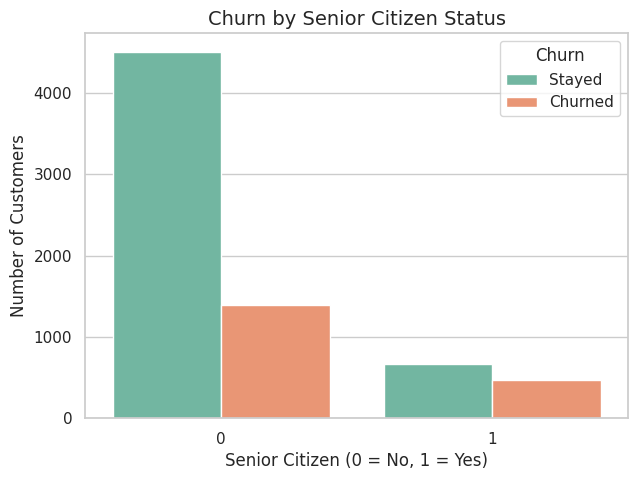

In [237]:
plt.figure(figsize=(7, 5))
sns.countplot(x='seniorcitizen', hue='churn', data=df, palette='Set2')
plt.title('Churn by Senior Citizen Status', fontsize=14)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

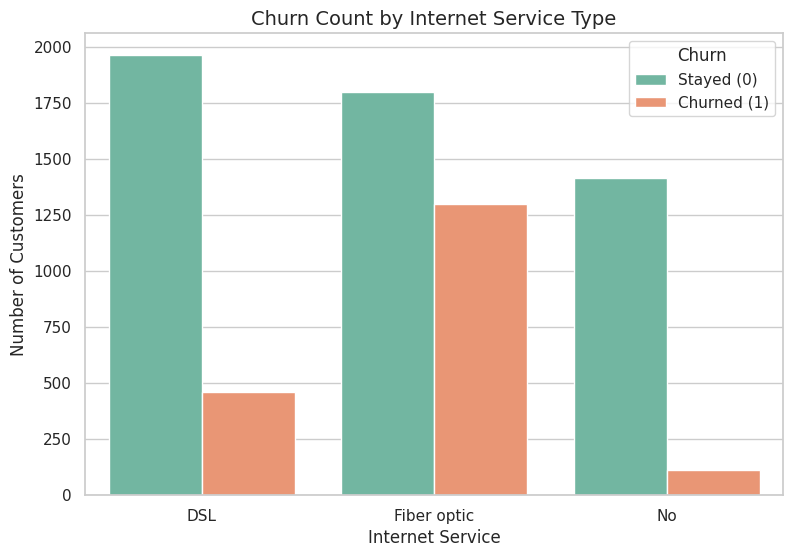

In [238]:
plt.figure(figsize=(9, 6))
sns.countplot(x='internetservice', hue='churn', data=df, palette='Set2')
plt.title('Churn Count by Internet Service Type', fontsize=14)
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

In [239]:
internet_churn = pd.crosstab(df['internetservice'], df['churn'], normalize='index') * 100
internet_churn.columns = ['Stayed (%)', 'Churned (%)']
print("\nChurn Percentage by Internet Service:")
print(internet_churn.round(2))


Churn Percentage by Internet Service:
                 Stayed (%)  Churned (%)
internetservice                         
DSL                   81.04        18.96
Fiber optic           58.11        41.89
No                    92.60         7.40


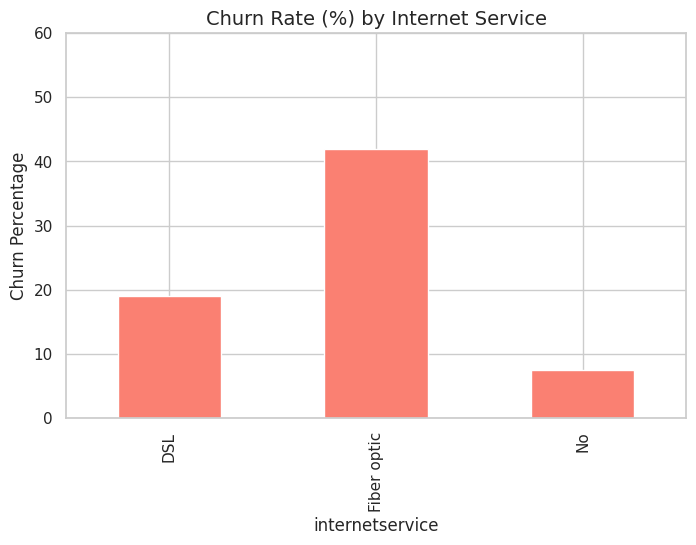

In [240]:
internet_churn['Churned (%)'].plot(kind='bar', figsize=(8,5), color='salmon')
plt.title('Churn Rate (%) by Internet Service', fontsize=14)
plt.ylabel('Churn Percentage')
plt.ylim(0, 60)
plt.show()

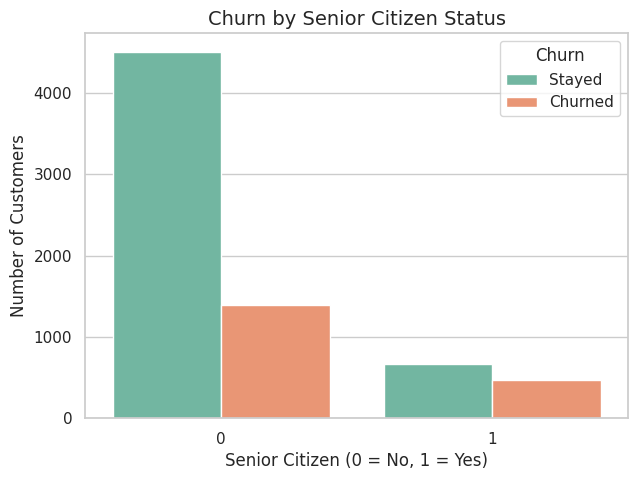

In [241]:
plt.figure(figsize=(7, 5))
sns.countplot(x='seniorcitizen', hue='churn', data=df, palette='Set2')
plt.title('Churn by Senior Citizen Status', fontsize=14)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()

In [242]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [243]:
df_encoded = pd.get_dummies(df, columns=['gender', 'contract', 'paymentmethod', 'internetservice'], drop_first=True)

In [244]:
df.head(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


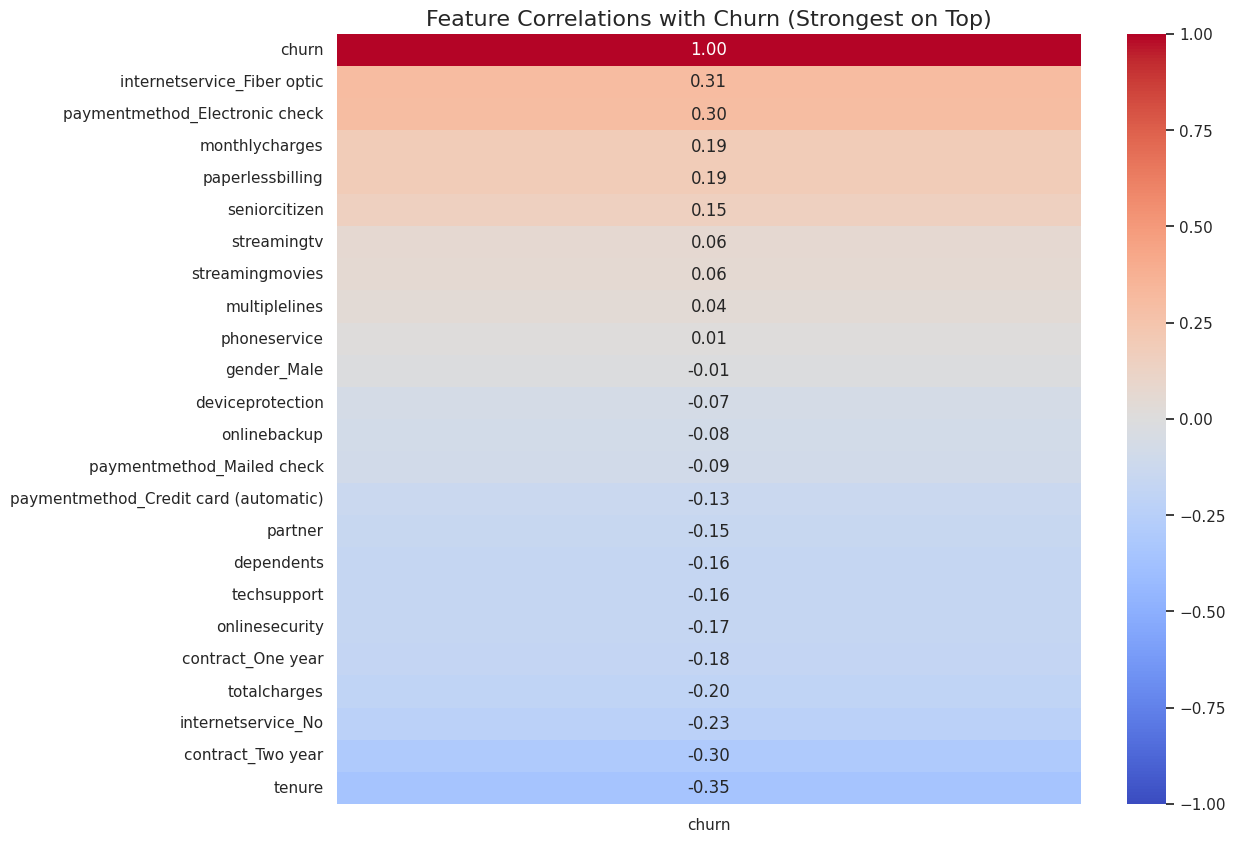

In [245]:
plt.figure(figsize=(12, 10))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Feature Correlations with Churn (Strongest on Top)', fontsize=16)
plt.show()

In [246]:
print("\nTop features positively correlated with Churn:")
print(corr_matrix['churn'].sort_values(ascending=False).head(10).round(3))

print("\nTop features negatively correlated with Churn:")
print(corr_matrix['churn'].sort_values(ascending=True).head(5).round(3))


Top features positively correlated with Churn:
churn                             1.000
internetservice_Fiber optic       0.308
paymentmethod_Electronic check    0.302
monthlycharges                    0.193
paperlessbilling                  0.192
seniorcitizen                     0.151
streamingtv                       0.063
streamingmovies                   0.061
multiplelines                     0.040
phoneservice                      0.012
Name: churn, dtype: float64

Top features negatively correlated with Churn:
tenure               -0.352
contract_Two year    -0.302
internetservice_No   -0.228
totalcharges         -0.199
contract_One year    -0.178
Name: churn, dtype: float64


In [247]:
df.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


In [248]:
df = df.dropna(subset=['totalcharges'])

In [249]:
X.isna().sum().sort_values(ascending=False)

,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
onlinesecurity,0
onlinebackup,0
deviceprotection,0
techsupport,0


In [250]:
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nTarget balance:\n", y.value_counts(normalize=True).round(3) * 100)

X shape: (7043, 23)
y shape: (7043,)

Target balance:
 churn
0    73.5
1    26.5
Name: proportion, dtype: float64


In [251]:
X = X.dropna()
y = y.loc[X.index]


In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 5625
Test size: 1407


In [253]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [254]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.4f} ({acc*100:.2f}%)")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.8024 (80.24%)

Confusion Matrix:
[[916 117]
 [161 213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



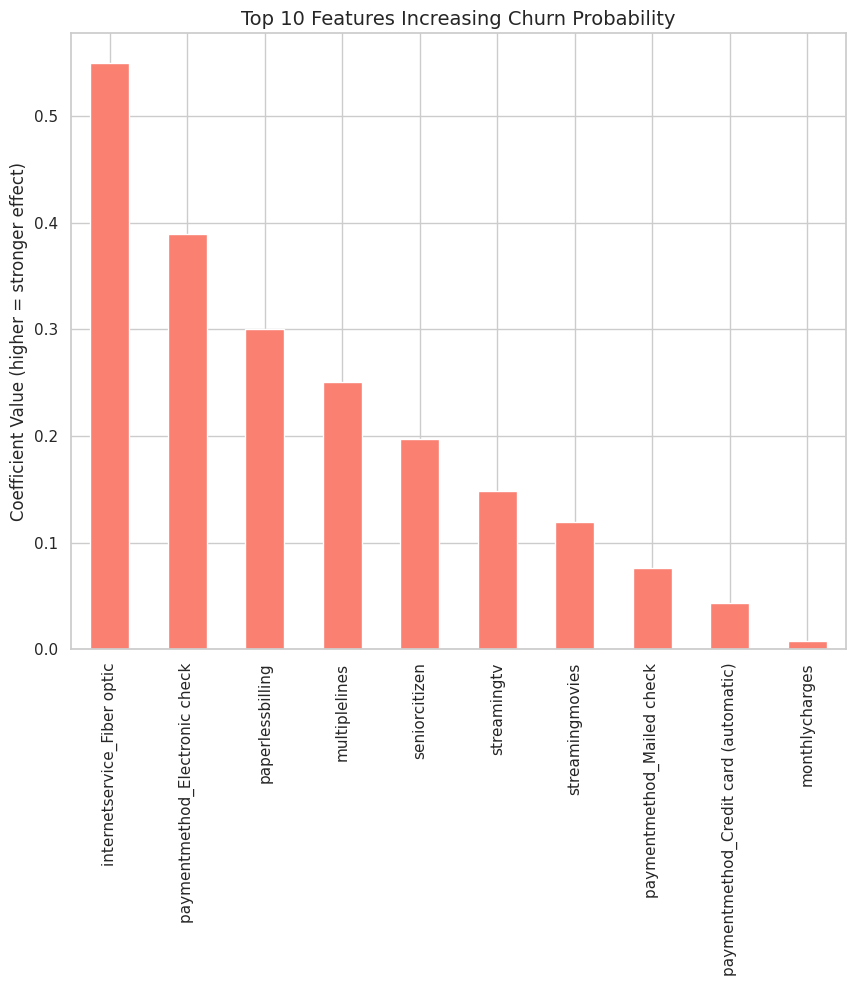


Top positive coefficients (increase churn):
internetservice_Fiber optic              0.550
paymentmethod_Electronic check           0.389
paperlessbilling                         0.300
multiplelines                            0.251
seniorcitizen                            0.197
streamingtv                              0.148
streamingmovies                          0.119
paymentmethod_Mailed check               0.077
paymentmethod_Credit card (automatic)    0.043
monthlycharges                           0.008
dtype: float64

Top negative coefficients (decrease churn):
onlinesecurity       -0.484
internetservice_No   -0.580
contract_One year    -0.749
phoneservice         -0.800
contract_Two year    -1.358
dtype: float64


In [255]:
import pandas as pd

coef = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
coef.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Features Increasing Churn Probability', fontsize=14)
plt.ylabel('Coefficient Value (higher = stronger effect)')
plt.show()

print("\nTop positive coefficients (increase churn):")
print(coef.head(10).round(3))

print("\nTop negative coefficients (decrease churn):")
print(coef.tail(5).round(3))

In [256]:
# Install if needed (usually already there)
!pip install sqlalchemy --quiet

from sqlalchemy import create_engine
import sqlite3

engine = create_engine('sqlite:///churn.db')

df.to_sql('telco_churn', engine, if_exists='replace', index=False)

print("Dataset imported to SQLite table 'telco_churn' successfully!")

Dataset imported to SQLite table 'telco_churn' successfully!


In [257]:
df.to_csv('cleaned_telco_churn.csv', index=False)

In [258]:
query = "SELECT * FROM telco_churn LIMIT 5;"
result = pd.read_sql(query, engine)
result

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [259]:
#How many total customers are in the dataset?

query = "SELECT COUNT(*) AS total_customers FROM telco_churn;"
result = pd.read_sql(query, engine)
result

,total_customers
0,7032


In [260]:
#What is the overall churn rate (as percentage with 2 decimal places)?
query='SELECT ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_rate_percent FROM telco_churn;'
result = pd.read_sql(query, engine)
result

,churn_rate_percent
0,26.58


In [261]:
#Show average tenure and average monthly charges for customers who churned vs who stayed.
query='''SELECT
    Churn,
    ROUND(AVG(tenure), 2) AS avg_tenure_months,
    ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charges
FROM telco_churn
GROUP BY Churn;'''
result = pd.read_sql(query, engine)
result

,churn,avg_tenure_months,avg_monthly_charges
0,0,37.65,61.31
1,1,17.98,74.44


In [262]:
# Count customers by gender and show how many churned in each group.
query='''SELECT
    gender,
    COUNT(*) AS total,
    SUM(Churn) AS churned,
    ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_percent
FROM telco_churn
GROUP BY gender;'''
result = pd.read_sql(query, engine)
result

,gender,total,churned,churn_percent
0,Female,3483,939,26.96
1,Male,3549,930,26.20


In [263]:
# What are the 3 most common payment methods and their churn rates?
query='''SELECT
    PaymentMethod,
    COUNT(*) AS total_customers,
    SUM(Churn) AS churned,
    ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_rate_pct
FROM telco_churn
GROUP BY PaymentMethod
ORDER BY total_customers DESC
LIMIT 3;'''
result = pd.read_sql(query, engine)
result

,paymentmethod,total_customers,churned,churn_rate_pct
0,Electronic check,2365,1071,45.29
1,Mailed check,1604,308,19.20
2,Bank transfer (automatic),1542,258,16.73


In [264]:
# Show churn count and churn percentage by Contract type, sorted from highest to lowest churn rate.
query='''SELECT
    Contract,
    COUNT(*) AS total,
    SUM(Churn) AS churned,
    ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_pct
FROM telco_churn
GROUP BY Contract
ORDER BY churn_pct DESC;'''
result = pd.read_sql(query, engine)
result

,contract,total,churned,churn_pct
0,Month-to-month,3875,1655,42.71
1,One year,1472,166,11.28
2,Two year,1685,48,2.85


In [265]:
#  Which internet service type has the highest churn rate? Show total customers, churned count, and percentage.
query='''SELECT
    InternetService,
    COUNT(*) AS total,
    SUM(Churn) AS churned,
    ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_pct
FROM telco_churn
GROUP BY InternetService
ORDER BY churn_pct DESC
LIMIT 1;'''
result = pd.read_sql(query, engine)
result

,internetservice,total,churned,churn_pct
0,Fiber optic,3096,1297,41.89


In [266]:
# Show average TotalCharges for customers grouped by whether they are senior citizens or not.
query='''SELECT
    SeniorCitizen,
    ROUND(AVG(TotalCharges), 2) AS avg_total_charges,
    COUNT(*) AS customer_count
FROM telco_churn
GROUP BY SeniorCitizen;'''
result = pd.read_sql(query, engine)
result

,seniorcitizen,avg_total_charges,customer_count
0,0,2181.09,5890
1,1,2810.47,1142


In [267]:
# Count how many customers have both OnlineSecurity and OnlineBackup (1 = yes for both)
query='''SELECT
    COUNT(*) AS customers_with_both_services
FROM telco_churn
WHERE OnlineSecurity = 1 AND OnlineBackup = 1;'''
result = pd.read_sql(query, engine)
result

,customers_with_both_services
0,1123


In [268]:
# Show the number of customers and churn rate for people who have PaperlessBilling = 1 vs 0.
query='''SELECT
    PaperlessBilling,
    COUNT(*) AS total,
    SUM(Churn) AS churned,
    ROUND(100.0 * SUM(Churn) / COUNT(*), 2) AS churn_pct
FROM telco_churn
GROUP BY PaperlessBilling;'''
result = pd.read_sql(query, engine)
result

,paperlessbilling,total,churned,churn_pct
0,0,2864,469,16.38
1,1,4168,1400,33.59
